### Sparse Matrix

In [1]:
import numpy as np
from scipy.sparse import csr_matrix

In [4]:
a = np.array([
    [0, 0, 3, 2, 0, 0, 0],
    [0, 4, 0, 0, 5, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
])

a

array([[0, 0, 3, 2, 0, 0, 0],
       [0, 4, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [5]:
m = csr_matrix(a)
m

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [7]:
m.getrow(0).indices, m.getrow(0).data

(array([2, 3], dtype=int32), array([3, 2]))

In [8]:
m.getrow(1).indices, m.getrow(1).data

(array([1, 4], dtype=int32), array([4, 5]))

### Datetime and Timedelta

In [16]:
from datetime import datetime, timedelta

In [19]:
datetime(year=2021, month=5, day=28, hour=14, minute=12) + timedelta(minutes=5)

datetime.datetime(2021, 5, 28, 14, 17)

In [20]:
datetime(year=2021, month=5, day=28, hour=14, minute=12) - timedelta(minutes=5)

datetime.datetime(2021, 5, 28, 14, 7)

### Pandas Iterows

In [21]:
import pandas as pd

In [30]:
df = pd.DataFrame(a)
df = df.rename(columns={3: 'a'})
df

,0,1,2,a,4,5,6
0,0,0,3,2,0,0,0
1,0,4,0,0,5,0,0
2,0,0,0,0,0,0,0


In [54]:
for idx, r in df.iterrows():
    print(r.a, r.get('b', 'Bus'))

2 Bus
0 Bus
0 Bus


### Classes

In [32]:
from typing import List
from datetime import datetime
from typing import Optional

from datetime import datetime, timedelta

In [33]:
class Connection(object):
    """ A connection in the graph """

    def __init__(self, dep_stop: int, arr_stop: int, dep_time: datetime, arr_time: datetime, trip_id: str):
        self.dep_stop = dep_stop
        self.arr_stop = arr_stop
        self.dep_time = dep_time
        self.arr_time = arr_time
        self.trip_id = trip_id


class Footpath(object):
    """ A footpath in the graph """

    def __init__(self, dep_stop: int, arr_stop: int, walk_time: timedelta):
        self.dep_stop = dep_stop
        self.arr_stop = arr_stop
        self.walk_time = walk_time

In [34]:
class JourneyPointer(object):
    """
    Pointers used to reconstruct the journey from the source to the sink

    Attributes:

    - :class:`datetime` arrival_time --> The latest time at which someone can
        arrive at the stop to make the connection.
    - :class:`Optional[Connection]` enter_connection --> If none, then this
        journey is a simple walk from a node to the sink. Otherwise, this is
        the connection from the
    - :class:`Optional[Connection]` exit_connection --> The name of the test object
    - :class:`Footpath` footpath --> The name of the test object
    """

    def __init__(self,
                 arrival_time: datetime,
                 enter_connection: Optional[Connection],
                 exit_connection: Optional[Connection],
                 footpath: Optional[Footpath]):

        self.arrival_time = arrival_time
        self.enter_connection = enter_connection
        self.exit_connection = exit_connection
        self.footpath = footpath


In [35]:
class SortedJourneyList(object):
    """ list of JourneyPointer, sorted in descending order of arrival time """

    def __init__(self, data: List[JourneyPointer]):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):
        return self.data[item]

    def append(self, e: JourneyPointer):
        for i, elem in enumerate(self.data):
            if elem.arrival_time <= e.arrival_time:
                self.data = self.data[:i] + [e] + self.data[i:]
                return
        self.data = self.data + [e]

    def remove_earliest_arrival(self):
        self.data = self.data[:-1]

In [36]:
d1 = datetime(year=2021, month=5, day=28, hour=14, minute=12)
d2 = datetime(year=2021, month=5, day=28, hour=14, minute=14)
d3 = datetime(year=2021, month=5, day=28, hour=14, minute=10)

In [37]:
j1 = JourneyPointer(d1, None, None, None)
j2 = JourneyPointer(d2, None, None, None)
j3 = JourneyPointer(d3, None, None, None)

In [38]:
l = SortedJourneyList([j1])

In [40]:
l[0].arrival_time

datetime.datetime(2021, 5, 28, 14, 12)

In [41]:
len(l)

1

In [42]:
l.append(j2)

In [43]:
len(l)

2

In [44]:
l[0].arrival_time, l[1].arrival_time

(datetime.datetime(2021, 5, 28, 14, 14),
 datetime.datetime(2021, 5, 28, 14, 12))

In [45]:
l.append(j3)

In [46]:
len(l)

3

In [47]:
l[0].arrival_time, l[1].arrival_time, l[2].arrival_time

(datetime.datetime(2021, 5, 28, 14, 14),
 datetime.datetime(2021, 5, 28, 14, 12),
 datetime.datetime(2021, 5, 28, 14, 10))

In [48]:
l.remove_earliest_arrival()

In [49]:
len(l)

2

In [51]:
l[0].arrival_time, l[1].arrival_time

(datetime.datetime(2021, 5, 28, 14, 14),
 datetime.datetime(2021, 5, 28, 14, 12))

### Example

In [52]:
# (dep_stop, arr_stop, dep_time, arr_time, trip_id)
e_c = [
    [1, 3, time(15), time(18), '||'],
    [1, 2, time(13), time(15), '|'],
    [0, 1, time(10), time(15), '||'],
    [4, 1, time(9), time(13), '|'],
    [6, 0, time(8), time(10), '||'],
    [5, 4, time(7), time(12), '|'],
]

df_connections = pd.DataFrame(
    e_c, columns=['dep_stop', 'arr_stop', 'dep_time', 'arr_time', 'trip']
)

df_connections.head()

,dep_stop,arr_stop,dep_time,arr_time,trip
0,1,3,15:00:00,18:00:00,||
1,1,2,13:00:00,15:00:00,|
2,0,1,10:00:00,15:00:00,||
3,4,1,09:00:00,13:00:00,|
4,6,0,08:00:00,10:00:00,||


### Distributions

In [64]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [120]:
def generate_integer_gaussian(mean_range=[0.75, 1.75], sigma_range=[1.5, 2.5], num_values=1000):
    mean = random.uniform(*mean_range)
    sigma = random.uniform(*sigma_range)
    values = 20 * [0]
    for i in range(num_values):
        v = random.gauss(mean, sigma)
        if v > 0:
            values[int(v)] += 1
    return values


def probabilities(int_gaussian):
    num_values = sum(int_gaussian)
    return [v/num_values for v in int_gaussian]

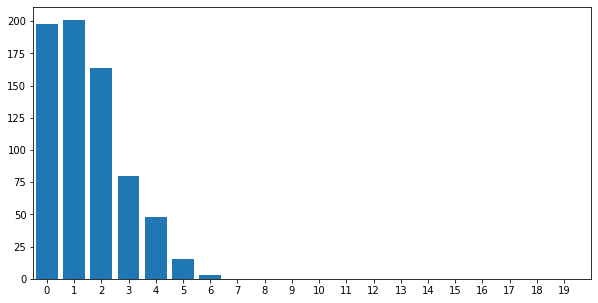

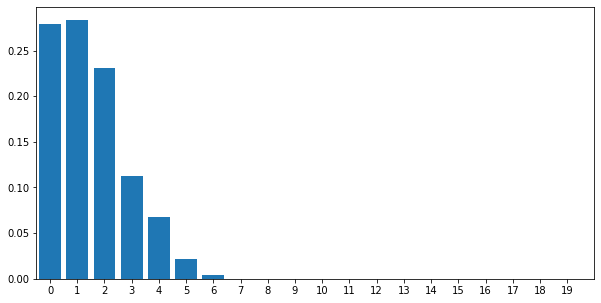

In [129]:
random_dist = generate_integer_gaussian(mean_range=[0.75, 1.75], sigma_range=[1.5, 2.5], num_values=1000)
probas = probabilities(random_dist)

plt.figure(figsize=(10, 5))
plt.xlim(-0.5, 20)
plt.xticks(range(20))
plt.bar(range(20), random_dist)
plt.show()


plt.figure(figsize=(10, 5))
plt.xlim(-0.5, 20)
plt.xticks(range(20))
plt.bar(range(20), probas)
plt.show()

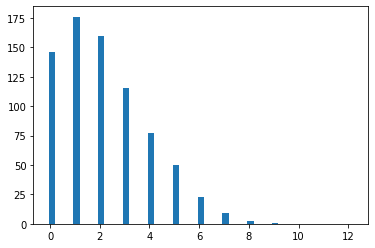

In [101]:
bins = [(x - 0.25)/4 for x in range(50)]

plt.hist(generate_integer_gaussian(mean_range=[0.75, 1.75], sigma_range=[1.5, 2.5], num_values=1000), bins=bins)
plt.show()